In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'bb731c40-3277-425d-89b3-ffcd7d93adf9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-06T17:54:50.936Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 10059}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11104, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [34]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11104,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.970821e+07,1.970821e+07,False,NaN,1,NaN,NaN,None,2024-06-06T17:54:00.000Z,71052.004580,2.558718e+10,-24.5486,0.122854,-0.842852,2.270684,12.045754,1.921757,3.457844,1.400308e+12,53.1791,1.492092e+12,None,2024-06-06T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 10:54:51.941581
1,1027,Ethereum,ETH,ethereum,9043,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201491e+08,1.201491e+08,True,NaN,2,NaN,NaN,None,2024-06-06T17:53:00.000Z,3828.012961,1.415372e+10,2.6518,-0.097028,-0.222867,0.395722,25.060655,13.113289,-3.451905,4.599322e+11,17.4635,4.599322e+11,None,2024-06-06T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 10:54:51.941581
2,825,Tether USDt,USDT,tether,87904,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.123921e+11,1.150861e+11,True,NaN,3,NaN,NaN,None,2024-06-06T17:53:00.000Z,0.999676,5.865458e+10,-13.7747,-0.023626,-0.016185,-0.016802,-0.033327,-0.030828,-0.199702,1.123556e+11,4.2661,1.150488e+11,None,2024-06-06T17:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-06 10:54:51.941581
3,1839,BNB,BNB,bnb,2179,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.473536e+08,1.473536e+08,False,NaN,4,NaN,NaN,None,2024-06-06T17:53:00.000Z,704.739191,3.065879e+09,-15.2427,0.391183,0.579107,17.592979,18.884456,20.962805,45.895868,1.038459e+11,3.9430,1.038459e+11,None,2024-06-06T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 10:54:51.941581
4,5426,Solana,SOL,solana,677,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.599153e+08,5.775628e+08,True,NaN,5,NaN,NaN,None,2024-06-06T17:53:00.000Z,171.686465,1.735907e+09,-32.3252,-0.030593,-1.649624,-0.072908,11.627381,-4.677610,14.711829,7.896124e+10,2.9981,9.915972e+10,None,2024-06-06T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 10:54:51.941581
5,3408,USDC,USDC,usd-coin,19616,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.250887e+10,3.250887e+10,False,NaN,6,NaN,NaN,None,2024-06-06T17:53:00.000Z,0.999992,5.552913e+09,-10.2296,-0.018565,0.008869,-0.025608,-0.000785,0.011514,0.010286,3.250861e+10,1.2343,3.250861e+10,None,2024-06-06T17:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-06 10:54:51.941581
6,52,XRP,XRP,xrp,1339,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.545036e+10,9.998757e+10,False,NaN,7,NaN,NaN,None,2024-06-06T17:54:00.000Z,0.525361,1.138106e+09,-5.1449,-0.047699,-0.409539,0.007415,-3.031872,-11.804535,-15.893689,2.913144e+10,1.1061,5.253608e+10,None,2024-06-06T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 10:54:51.941581
7,74,Dogecoin,DOGE,dogecoin,983,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.445996e+11,1.445996e+11,True,NaN,8,NaN,NaN,None,2024-06-06T17:54:00.000Z,0.161652,7.740752e+08,-8.7515,-0.320223,-1.019697,-0.818717,4.383922,-19.170247,-4.078730,2.337477e+10,0.8875,2.337477e+10,None,2024-06-06T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 10:54:51.941581
8,11419,Toncoin,TON,toncoin,387,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.43

In [38]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'bb731c40-3277-425d-89b3-ffcd7d93adf9',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # Use this if you want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df, df_append])

    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'/Users/administrator/Documents/Data Analytics Bootcamp/Python/API.csv'):
        df.to_csv(r'/Users/administrator/Documents/Data Analytics Bootcamp/Python/API.csv', header = 'column_names')
    else:
        df.to_csv(r'/Users/administrator/Documents/Data Analytics Bootcamp/Python/API.csv', mode = 'a', header = False)

In [46]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [119]:
df = pd.read_csv(r'/Users/administrator/Documents/Data Analytics Bootcamp/Python/API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11104,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19708206.00000,19708206.00000,False,NaN,1,NaN,NaN,NaN,2024-06-06T18:18:00.000Z,70918.69039,25233557421.28970,-25.20340,-0.15632,-0.47046,2.51809,12.21709,1.99329,3.29040,1397680159384.38623,53.13840,1489292498113.33008,NaN,2024-06-06T18:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 11:20:40.114228
1,1,1027,Ethereum,ETH,ethereum,9043,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120149064.13354,120149064.13354,True,NaN,2,NaN,NaN,NaN,2024-06-06T18:18:00.000Z,3829.63057,13528995990.41804,-5.95660,0.00779,-0.72648,0.81998,25.55552,13.36180,-2.90111,460126528754.48560,17.49270,460126528754.48999,NaN,2024-06-06T18:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 11:20:40.114228
2,2,825,Tether USDt,USDT,tether,87904,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112392062235.46796,115086088103.48178,True,NaN,3,NaN,NaN,NaN,2024-06-06T18:18:00.000Z,0.99971,57735389887.69849,-15.57590,-0.00584,-0.01470,-0.00089,-0.03837,-0.04200,-0.15420,112359210297.53229,4.27160,115052448708.06000,NaN,2024-06-06T18:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-06 11:20:40.114228
3,3,1839,BNB,BNB,bnb,2179,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147353646.34522,147353646.34522,False,NaN,4,NaN,NaN,NaN,2024-06-06T18:18:00.000Z,704.71153,3039749723.26619,-15.83430,0.02666,0.76286,17.77826,19.20021,21.27230,45.26534,103841814132.68204,3.94780,103841814132.67999,NaN,2024-06-06T18:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 11:20:40.114228
4,4,5426,Solana,SOL,solana,677,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,459915322.98947,577562848.67801,True,NaN,5,NaN,NaN,NaN,2024-06-06T18:18:00.000Z,171.50544,1706928369.08679,-33.35990,-0.06158,-1.45955,0.44732,12.35719,-4.16650,14.66588,78877979898.49422,2.99870,99055170573.62000,NaN,2024-06-06T18:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 11:20:40.114228
5,5,3408,USDC,USDC,usd-coin,19616,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32508866807.92676,32508866807.92676,False,NaN,6,NaN,NaN,NaN,2024-06-06T18:18:00.000Z,1.00005,5462705634.29380,-12.59520,-0.00934,0.00812,0.01090,-0.00154,0.00310,0.03559,32510355739.94456,1.23600,32510355739.94000,NaN,2024-06-06T18:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-06 11:20:40.114228
6,6,52,XRP,XRP,xrp,1339,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55450358947.00000,99987572899.00000,False,NaN,7,NaN,NaN,NaN,2024-06-06T18:19:00.000Z,0.52330,1145148328.60992,-3.74180,-0.40030,-0.73058,-0.30026,-3.25042,-11.85693,-16.02112,29017414993.85144,1.10320,52330436709.32000,NaN,2024-06-06T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 11:20:40.114228
7,7,74,Dogecoin,DOGE,dogecoin,983,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144599616383.70523,144599616383.70523,True,NaN,8,NaN,NaN,NaN,2024-06-06T18:19:00.000Z,0.16097,771965523.20126,-8.81790,-0.64420,-1.56916,-0.95545,4.52214,-18.74651,-4.78441,23275580907.12569,0.88490,23275580907.13000,NaN,2024-06-06T1

In [121]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [123]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11104,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19708206.00000,19708206.00000,False,NaN,1,NaN,NaN,NaN,2024-06-06T18:18:00.000Z,70918.69039,25233557421.28970,-25.20340,-0.15632,-0.47046,2.51809,12.21709,1.99329,3.29040,1397680159384.38623,53.13840,1489292498113.33008,NaN,2024-06-06T18:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 11:20:40.114228
1,1,1027,Ethereum,ETH,ethereum,9043,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120149064.13354,120149064.13354,True,NaN,2,NaN,NaN,NaN,2024-06-06T18:18:00.000Z,3829.63057,13528995990.41804,-5.95660,0.00779,-0.72648,0.81998,25.55552,13.36180,-2.90111,460126528754.48560,17.49270,460126528754.48999,NaN,2024-06-06T18:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 11:20:40.114228
2,2,825,Tether USDt,USDT,tether,87904,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112392062235.46796,115086088103.48178,True,NaN,3,NaN,NaN,NaN,2024-06-06T18:18:00.000Z,0.99971,57735389887.69849,-15.57590,-0.00584,-0.01470,-0.00089,-0.03837,-0.04200,-0.15420,112359210297.53229,4.27160,115052448708.06000,NaN,2024-06-06T18:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-06 11:20:40.114228
3,3,1839,BNB,BNB,bnb,2179,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147353646.34522,147353646.34522,False,NaN,4,NaN,NaN,NaN,2024-06-06T18:18:00.000Z,704.71153,3039749723.26619,-15.83430,0.02666,0.76286,17.77826,19.20021,21.27230,45.26534,103841814132.68204,3.94780,103841814132.67999,NaN,2024-06-06T18:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 11:20:40.114228
4,4,5426,Solana,SOL,solana,677,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,459915322.98947,577562848.67801,True,NaN,5,NaN,NaN,NaN,2024-06-06T18:18:00.000Z,171.50544,1706928369.08679,-33.35990,-0.06158,-1.45955,0.44732,12.35719,-4.16650,14.66588,78877979898.49422,2.99870,99055170573.62000,NaN,2024-06-06T18:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 11:20:40.114228
5,5,3408,USDC,USDC,usd-coin,19616,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32508866807.92676,32508866807.92676,False,NaN,6,NaN,NaN,NaN,2024-06-06T18:18:00.000Z,1.00005,5462705634.29380,-12.59520,-0.00934,0.00812,0.01090,-0.00154,0.00310,0.03559,32510355739.94456,1.23600,32510355739.94000,NaN,2024-06-06T18:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-06 11:20:40.114228
6,6,52,XRP,XRP,xrp,1339,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55450358947.00000,99987572899.00000,False,NaN,7,NaN,NaN,NaN,2024-06-06T18:19:00.000Z,0.52330,1145148328.60992,-3.74180,-0.40030,-0.73058,-0.30026,-3.25042,-11.85693,-16.02112,29017414993.85144,1.10320,52330436709.32000,NaN,2024-06-06T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-06 11:20:40.114228
7,7,74,Dogecoin,DOGE,dogecoin,983,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144599616383.70523,144599616383.70523,True,NaN,8,NaN,NaN,NaN,2024-06-06T18:19:00.000Z,0.16097,771965523.20126,-8.81790,-0.64420,-1.56916,-0.95545,4.52214,-18.74651,-4.78441,23275580907.12569,0.88490,23275580907.13000,NaN,2024-06-06T1

In [125]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.21013,-0.38100,2.39981,12.25780,1.98792,3.35659
Ethereum,-0.08743,-0.85410,0.62681,25.57674,13.21613,-2.83941
Tether USDt,-0.00038,-0.01811,-0.01014,-0.03787,-0.03911,-0.17978
BNB,0.08623,0.89223,17.48999,19.34376,21.30603,45.33053
Solana,-0.14277,-1.40763,0.31700,12.57270,-4.18615,14.85084
USDC,-0.00168,0.00298,-0.00300,-0.00367,0.00759,0.01249
XRP,-0.40085,-0.69390,-0.31832,-3.23770,-11.88157,-15.95167
Dogecoin,-0.66737,-1.60774,-1.05498,4.50183,-18.74356,-4.65790
Toncoin,0.74954,-0.31527,13.49379,27.67369,38.64282,166.67215


In [127]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.21013
             quote.USD.percent_change_24h    -0.38100
             quote.USD.percent_change_7d      2.39981
             quote.USD.percent_change_30d    12.25780
             quote.USD.percent_change_60d     1.98792
             quote.USD.percent_change_90d     3.35659
Ethereum     quote.USD.percent_change_1h     -0.08743
             quote.USD.percent_change_24h    -0.85410
             quote.USD.percent_change_7d      0.62681
             quote.USD.percent_change_30d    25.57674
             quote.USD.percent_change_60d    13.21613
             quote.USD.percent_change_90d    -2.83941
Tether USDt  quote.USD.percent_change_1h     -0.00038
             quote.USD.percent_change_24h    -0.01811
             quote.USD.percent_change_7d     -0.01014
             quote.USD.percent_change_30d    -0.03787
             quote.USD.percent_change_60d    -0.03911
             quote.USD.percent_change_90

In [129]:
type(df4)

pandas.core.series.Series

In [131]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.21013
            quote.USD.percent_change_24h  -0.38100
            quote.USD.percent_change_7d    2.39981
            quote.USD.percent_change_30d  12.25780
            quote.USD.percent_change_60d   1.98792
            quote.USD.percent_change_90d   3.35659
Ethereum    quote.USD.percent_change_1h   -0.08743
            quote.USD.percent_change_24h  -0.85410
            quote.USD.percent_change_7d    0.62681
            quote.USD.percent_change_30d  25.57674
            quote.USD.percent_change_60d  13.21613
            quote.USD.percent_change_90d  -2.83941
Tether USDt quote.USD.percent_change_1h   -0.00038
            quote.USD.percent_change_24h  -0.01811
            quote.USD.percent_change_7d   -0.01014
            quote.USD.percent_change_30d  -0.03787
            quote.USD.percent_change_60d  -0.03911
            quote.USD.percent_change_90d  -0.17978
BNB         quote.USD.percent_change_1h    0.08623
            quote.USD.percent_change_24h   0.89223
            quote.USD.percent_change_7d   17.48999
            quote.USD.percent_change_30d  19.34376
            quote.USD.percent_change_60d  21.30603
            quote.USD.percent_change_90d  45.33053
Solana      quote.USD.percent_change_1h   -0.14277
            quote.USD.percent_change_24h  -1.40763
            quote.USD.percent_change_7d    0.31700
            quote.USD.percent_change_30d  12.57270
            quote.USD.percent_change_60d  -4.18615
            quote.USD.percent_change_90d  14.85084
USDC        quote.USD.percent_change_1h   -0.00168
            quote.USD.percent_change_24h   0.00298
            quote.USD.percent_change_7d   -0.00300
            quote.USD.percent_change_30d  -0.00367
            quote.USD.percent_change_60d   0.00759
            quote.USD.percent_change_90d   0.01249
XRP         quote.USD.percent_change_1h   -0.40085
            quote.USD.percent_change_24h  -0.69390
            quote.USD.percent_change_7d   -0.31832
            quote.USD.percent_change_30d  -3.23770
            quote.USD.percent_change_60d -11.88157
            quote.USD.percent_change_90d -15.95167
Dogecoin    quote.USD.percent_change_1h   -0.66737
            quote.USD.percent_change_24h  -1.60774
            quote.USD.percent_change_7d   -1.05498
            quote.USD.percent_change_30d   4.50183
            quote.USD.percent_change_60d -18.74356
            quote.USD.percent_change_90d  -4.65790
Toncoin     quote.USD.percent_change_1h    0.74954
            quote.USD.percent_change_24h  -0.31527
            quote.USD.percent_change_7d   13.49379
            quote.USD.percent_change_30d  27.67369
            quote.USD.percent_change_60d  38.64282
            quote.USD.percent_change_90d 166.67215
Cardano     quote.USD.percent_change_1h   -0.22103
            quote.USD.percent_change_24h  -0.95554
            quote.USD.percent_change_7d    1.02625
            quote.USD.percent_change_30d   1.73591
            quote.USD.percent_change_60d -22.29618
            quote.USD.percent_change_90d -37.00764
Shiba Inu   quote.USD.percent_change_1h   -0.13865
            quote.USD.percent_change_24h  -1.74514
            quote.USD.percent_change_7d   -4.04359
            quote.USD.percent_change_30d   7.78561
            quote.USD.percent_change_60d -10.47647
            quote.USD.percent_change_90d -27.98025
Avalanche   quote.USD.percent_change_1h   -0.41830
            quote.USD.percent_change_24h  -0.53592
            quote.USD.percent_change_7d   -1.04208
            quote.USD.percent_change_30d  -0.11005
            quote.USD.percent_change_60d -24.70321
            quote.USD.percent_change_90d -14.35011
Polkadot    quote.USD.percent_change_1h   -0.44287
            quote.USD.percent_change_24h  -1.00846
            quote.USD.percent_change_7d    1.36808
            quote.USD.percent_change_30d   0.36860
            quote.USD.percent_change_60d -16.49788
            quo

In [133]:
df5.count()

values    90
dtype: int64

In [135]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.21013
1,Bitcoin,quote.USD.percent_change_24h,-0.38100
2,Bitcoin,quote.USD.percent_change_7d,2.39981
3,Bitcoin,quote.USD.percent_change_30d,12.25780
4,Bitcoin,quote.USD.percent_change_60d,1.98792
5,Bitcoin,quote.USD.percent_change_90d,3.35659
6,Ethereum,quote.USD.percent_change_1h,-0.08743
7,Ethereum,quote.USD.percent_change_24h,-0.85410
8,Ethereum,quote.USD.percent_change_7d,0.62681
9,Ethereum,quote.USD.percent_change_30d,25.57674


In [141]:
df7 = df6.rename(columns = {'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.21013
1,Bitcoin,quote.USD.percent_change_24h,-0.38100
2,Bitcoin,quote.USD.percent_change_7d,2.39981
3,Bitcoin,quote.USD.percent_change_30d,12.25780
4,Bitcoin,quote.USD.percent_change_60d,1.98792
5,Bitcoin,quote.USD.percent_change_90d,3.35659
6,Ethereum,quote.USD.percent_change_1h,-0.08743
7,Ethereum,quote.USD.percent_change_24h,-0.85410
8,Ethereum,quote.USD.percent_change_7d,0.62681
9,Ethereum,quote.USD.percent_change_30d,25.57674


In [143]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.21013
1,Bitcoin,24h,-0.38100
2,Bitcoin,7d,2.39981
3,Bitcoin,30d,12.25780
4,Bitcoin,60d,1.98792
5,Bitcoin,90d,3.35659
6,Ethereum,1h,-0.08743
7,Ethereum,24h,-0.85410
8,Ethereum,7d,0.62681
9,Ethereum,30d,25.57674


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

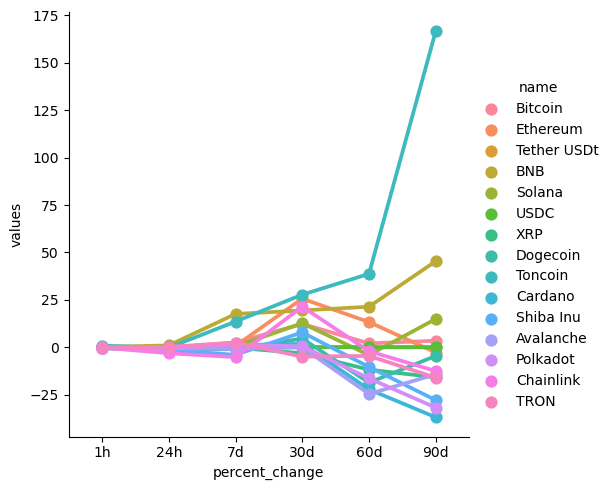

In [145]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [149]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,70918.69039,2024-06-06 11:20:40.114228
15,Bitcoin,70940.63914,2024-06-06 11:21:40.418905
30,Bitcoin,70942.42224,2024-06-06 11:23:45.207054
45,Bitcoin,70973.90943,2024-06-06 11:24:45.434423
60,Bitcoin,70978.65924,2024-06-06 11:25:45.689460


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


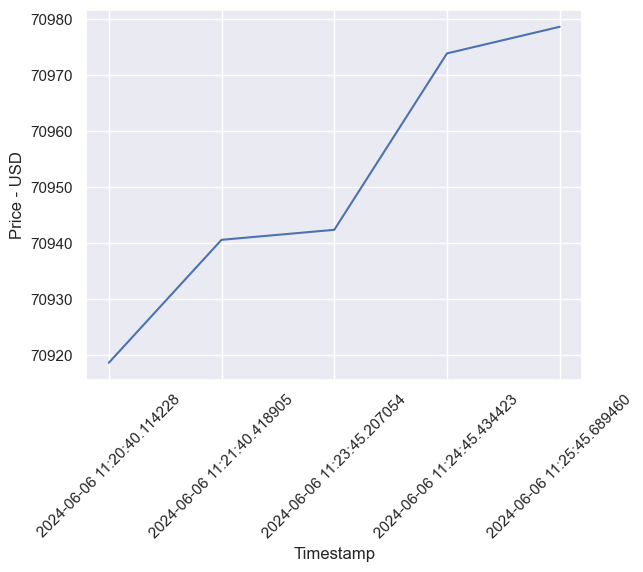

In [165]:
sns.set_theme(style= 'darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)
plt.xticks(rotation = 45)
plt.ylabel('Price - USD')
plt.xlabel('Timestamp')
plt.show()